<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Importância das Variáveis, Dependência Parcial e Shapley Values

## Importação das bibliotecas

In [1]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de Modelagem
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
from tensorflow import keras
from tensorflow.keras import layers

# Pacote de Interpretabilidade
import shap

# Funções customizadas
import preditiva

## Importação da base de dados

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preparação dos Dados

### Missing Values

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.drop(['Cabin'], axis=1, inplace=True)

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Duplicações

In [7]:
df.duplicated().sum()

0

### Tipos de Variáveis

In [8]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [10]:
df['Pclass'] = df['Pclass'].astype('object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    object 
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


## Análise Exploratória dos Dados

### Dispersão por Classe

Default bandwidth for data is 0; skipping density estimation.


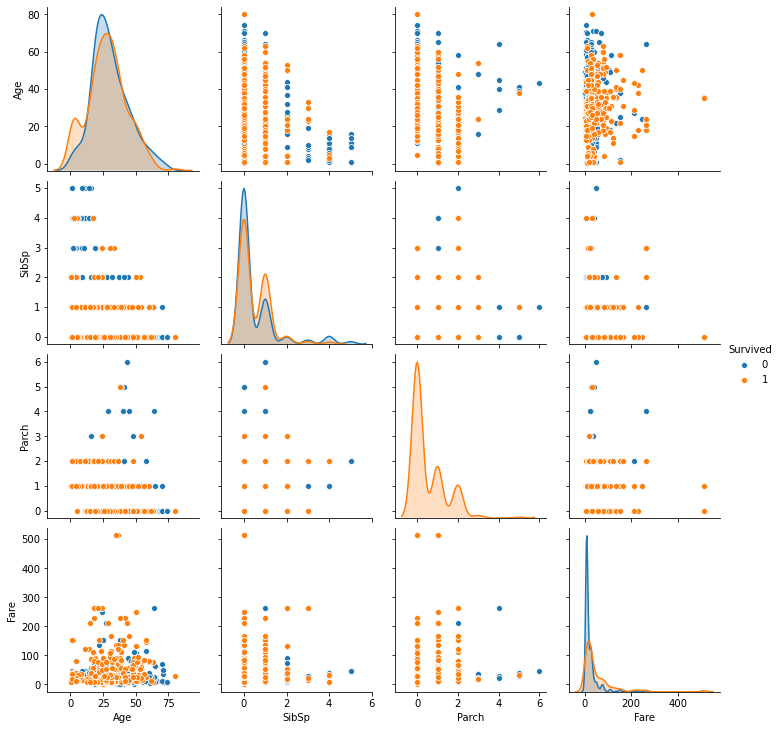

In [12]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df[['Survived', 'Age', 'SibSp','Parch','Fare']], 
             hue='Survived');

### Cálculo do IV

In [13]:
df_iv = preditiva.analise_iv(df[['Age','Pclass','Sex','Survived']],
                             'Survived', nbins=5)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
df_iv.get_lista_iv()

,IV
Variavel,
Sex,1.30
Pclass,0.56
Age,0.04


In [ ]:
df_iv.get_bivariada('Sex')

==> "Sex" tem IV de 1.3


Survived,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Sex,female,195,64,259,36.38,67.71,15.09,75.29,4.49,1.50,0.79
1,Sex,male,93,360,453,63.62,32.29,84.91,20.53,0.38,-0.97,0.51


In [17]:
df_iv.get_bivariada('Pclass')

==> "Pclass" tem IV de 0.56


Survived,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Pclass,1,120,64,184,25.84,41.67,15.09,65.22,2.76,1.02,0.27
1,Pclass,2,83,90,173,24.30,28.82,21.23,47.98,1.36,0.31,0.02
2,Pclass,3,85,270,355,49.86,29.51,63.68,23.94,0.46,-0.78,0.27


In [64]:
df_iv.get_bivariada('Age')

==> "Age" tem IV de 0.04


Survived,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Age,"(0.41, 19.0]",79,85,164,23.03,27.43,20.05,48.17,1.37,0.31,0.02
1,Age,"(19.0, 25.0]",45,92,137,19.24,15.62,21.70,32.85,0.72,-0.33,0.02
2,Age,"(25.0, 31.0]",50,77,127,17.84,17.36,18.16,39.37,0.96,-0.04,0.00
3,Age,"(31.0, 41.0]",62,81,143,20.08,21.53,19.10,43.36,1.13,0.12,0.00
4,Age,"(41.0, 80.0]",52,89,141,19.80,18.06,20.99,36.88,0.86,-0.15,0.00


### Relatórios Pandas Profiling e SweetViz

In [13]:
perfil_pp, perfil_sv = preditiva.gera_relatorios_aed(df=df,
                                                     target_feat='Survived')
sns.reset_defaults()

:PassengerId:                      |███▌                 | [ 17%]   00:00  -> (00:00 left)

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Desenvolvimento dos Modelos

### Definição do *Target* e das *Features*

In [15]:
# Target (variável resposta)
y_var = 'Survived'
y = df[y_var]

# Features (variáveis explicativas)
# Variáveis Numéricas
x_var_num = ['Age']
x_num = df[x_var_num].to_numpy()

# Variáveis Categóricas / Qualitativas
x_var_cat = ['Pclass', 'Sex']
x_cat = df[x_var_cat]

### Pré-processamento

In [16]:
# Criação das variáveis dummies para variáveis categóricas
x_cat_enc = OneHotEncoder(drop='first')
x_cat = x_cat_enc.fit_transform(x_cat).toarray()

# Unificação da base de dados
x = np.concatenate([x_num, x_cat], axis=1)

In [17]:
x

array([[22.,  0.,  1.,  1.],
       [38.,  0.,  0.,  0.],
       [26.,  0.,  1.,  0.],
       ...,
       [19.,  0.,  0.,  0.],
       [26.,  0.,  0.,  1.],
       [32.,  0.,  1.,  1.]])

In [18]:
x.shape

(712, 4)

### Divisão das bases em Treino e Teste

In [40]:
x

array([[22.,  0.,  1.,  1.],
       [38.,  0.,  0.,  0.],
       [26.,  0.,  1.,  0.],
       ...,
       [19.,  0.,  0.,  0.],
       [26.,  0.,  0.,  1.],
       [32.,  0.,  1.,  1.]])

In [19]:
# Divisão em treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=42)

### Padronização da Escala

In [20]:
# Padronização da Escala usando conjunto de treino
x_scaler = StandardScaler()
x_scaler.fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

### Modelo Simples: Regressão Logística

In [21]:
# Define estrutura e configurações do modelo
modelo_rl = LogisticRegression(fit_intercept=True,
                               random_state = 42)

# Ajusta o modelo
modelo_rl.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [22]:
# Obtenção dos coeficientes do modelo
print(f'Intercepto:\t\t  {modelo_rl.intercept_[0]:.3f}')

feat_lst = x_var_num + list(x_cat_enc.get_feature_names(x_var_cat))
for i, feat in enumerate(feat_lst):
    print(f'Coeficientes {feat}:\t {modelo_rl.coef_[0][i]:.3f}')

Intercepto:		  3.467
Coeficientes Age:	 -0.030
Coeficientes Pclass_2:	 -1.255
Coeficientes Pclass_3:	 -2.599
Coeficientes Sex_male:	 -2.520


In [23]:
# Métricas de Desempenho
preditiva.calcula_desempenho(modelo_rl, x_train, y_train, x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.799197,0.780374,-0.02
AUROC,0.872956,0.801408,-0.08
KS,0.635559,0.569850,-0.10
Precision,0.758065,0.792208,0.05
Recall,0.719388,0.663043,-0.08
F1,0.738220,0.721893,-0.02


### Modelo Complexo: Redes Neurais Artificiais

In [24]:
modelo_rna = keras.Sequential()

# Camada Oculta 1
modelo_rna.add(layers.Dense(8, 
                            activation='tanh', 
                            kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01),
                            input_dim=x_train_scaled.shape[1]))
modelo_rna.add(layers.Dropout(0.2))

# Camada Saída
modelo_rna.add(layers.Dense(1, activation='sigmoid'))

# Compilação do Modelo
modelo_rna.compile(loss='binary_crossentropy', 
                   optimizer=keras.optimizers.Adam(),
                   metrics=keras.metrics.AUC(name='auc'))

modelo_rna.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [25]:
rna_es = tf.keras.callbacks.EarlyStopping(
    monitor="val_auc",
    min_delta=0.01,
    patience = 20,
    verbose=2,
    mode='max',
    restore_best_weights=True)

historico = modelo_rna.fit(x=x_train_scaled, 
                           y=y_train,
                           epochs=50,
                           batch_size=8,
                           validation_split=0.1,
                           verbose=1,
                           callbacks=[rna_es])

Epoch 1/50
56/56 [==============================] - 5s 42ms/step - loss: 0.8961 - auc: 0.5802 - val_loss: 0.8841 - val_auc: 0.5921
Epoch 2/50
56/56 [==============================] - 1s 10ms/step - loss: 0.8422 - auc: 0.6417 - val_loss: 0.8262 - val_auc: 0.6002
Epoch 3/50
56/56 [==============================] - 1s 9ms/step - loss: 0.8215 - auc: 0.6601 - val_loss: 0.7809 - val_auc: 0.6290
Epoch 4/50
56/56 [==============================] - 1s 10ms/step - loss: 0.7235 - auc: 0.7374 - val_loss: 0.7498 - val_auc: 0.6787
Epoch 5/50
56/56 [==============================] - 1s 10ms/step - loss: 0.6916 - auc: 0.7580 - val_loss: 0.7248 - val_auc: 0.7460
Epoch 6/50
56/56 [==============================] - 0s 9ms/step - loss: 0.6718 - auc: 0.7949 - val_loss: 0.7047 - val_auc: 0.7748
Epoch 7/50
56/56 [==============================] - 1s 9ms/step - loss: 0.6488 - auc: 0.7799 - val_loss: 0.6885 - val_auc: 0.7893
Epoch 8/50
56/56 [==============================] - 0s 9ms/step - loss: 0.6269 - auc: 

In [26]:
preditiva.calcula_desempenho(modelo_rna, x_train_scaled, y_train, x_test_scaled, y_test)

,Treino,Teste,Variação
Acurácia,0.791165,0.752336,-0.05
AUROC,0.863580,0.788756,-0.09
KS,0.581126,0.537598,-0.07
Precision,0.752747,0.753247,0.00
Recall,0.698980,0.630435,-0.10
F1,0.724868,0.686391,-0.05


In [27]:
preditiva.calcula_desempenho(modelo_rl, x_train_scaled, y_train, x_test_scaled, y_test)

,Treino,Teste,Variação
Acurácia,0.664659,0.626168,-0.06
AUROC,0.870439,0.794547,-0.09
KS,0.610049,0.559337,-0.08
Precision,0.544892,0.544118,-0.00
Recall,0.897959,0.804348,-0.10
F1,0.678227,0.649123,-0.04


In [28]:
mw = modelo_rna.get_weights()

# Camada 1
age_w = list(mw[0][0])
pc2_w = list(mw[0][1])
pc3_w = list(mw[0][2])
sxm_w = list(mw[0][3])
bl1_w = list(mw[1])

modelo_rna_wl1 = pd.DataFrame([age_w, pc2_w, pc3_w, sxm_w, bl1_w]).T
modelo_rna_wl1.columns = ['Age','Pclass_2','Pclass_3','Sex_male','Bias L1']
modelo_rna_wl1

,Age,Pclass_2,Pclass_3,Sex_male,Bias L1
0,0.027033,0.004894,0.202092,0.242679,0.220930
1,-0.038695,-0.002446,-0.216982,-0.170045,-0.133680
2,0.304831,0.004280,0.034853,0.288312,0.117345
3,0.001011,-0.260825,0.106318,-0.708471,-0.023715
4,0.160667,0.004558,0.287590,-0.018118,0.138371
5,-0.186774,-0.011223,-0.125264,-0.503891,-0.157512
6,-0.354045,-0.383420,-0.269290,0.284492,0.183121
7,-0.166773,0.101796,0.661736,0.208979,0.157458


In [29]:
# Camada Saída
n1_w = list(mw[2][0])
n2_w = list(mw[2][0])
n3_w = list(mw[2][0])
n4_w = list(mw[2][0])
n5_w = list(mw[2][0])
n6_w = list(mw[2][0])
n7_w = list(mw[2][0])
n8_w = list(mw[2][0])
bo_w = list(mw[3])

modelo_rna_wlo = pd.DataFrame([n1_w, n2_w, n3_w, n4_w, n5_w,
                               n6_w, n7_w, n8_w, bo_w]).T
modelo_rna_wlo.columns = ['Neurônio 1','Neurônio 2','Neurônio 3',
                          'Neurônio 4','Neurônio 5','Neurônio 6',
                          'Neurônio 7','Neurônio 8','Bias_LO']
modelo_rna_wlo

,Neurônio 1,Neurônio 2,Neurônio 3,Neurônio 4,Neurônio 5,Neurônio 6,Neurônio 7,Neurônio 8,Bias_LO
0,-0.332892,-0.332892,-0.332892,-0.332892,-0.332892,-0.332892,-0.332892,-0.332892,-0.149921


## Interpretação das Redes Neurais usando SHAP

### Extração do Aprendizado da RNA

In [30]:
# Utilizar uma amostra de até 1.000 observações para extração do conhecimento
rna_explainer = shap.DeepExplainer(model=modelo_rna, 
                                   data=x_train_scaled)

rna_shap_values = rna_explainer.shap_values(X=x_train_scaled)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


### Importância das Variáveis

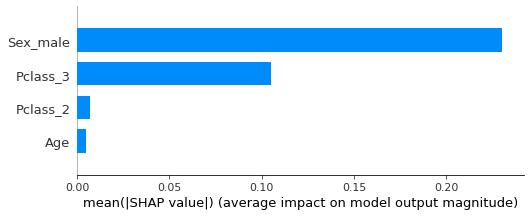

In [31]:
# ATENÇÃO: ajustar o shap_values de acordo com a saída do modelo
shap.summary_plot(shap_values=rna_shap_values[0],
                  plot_type='bar',
                  feature_names=feat_lst)

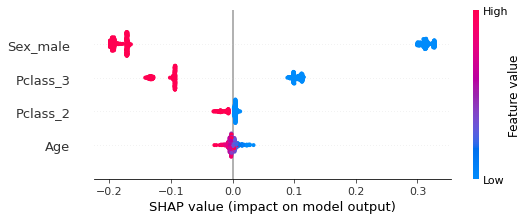

In [32]:
# ATENÇÃO: ajustar o shap_values de acordo com a saída do modelo
shap.summary_plot(shap_values=rna_shap_values[0], 
                  features=x_train,
                  feature_names=feat_lst,
                  plot_type='dot')

### Dependência Parcial

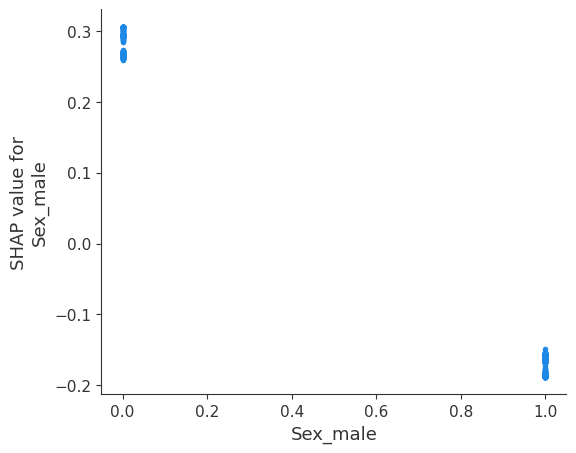

In [66]:
# Features mais importantes
shap.dependence_plot(ind='Sex_male', 
                     shap_values=rna_shap_values[0], 
                     features=x_train,
                     feature_names=feat_lst, 
                     interaction_index=None)

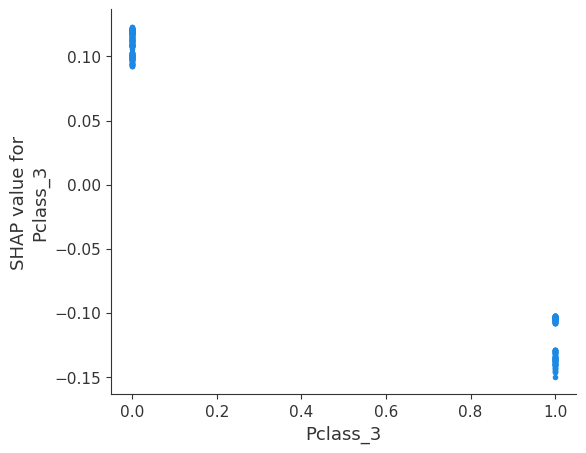

In [67]:
shap.dependence_plot(ind='Pclass_3', 
                     shap_values=rna_shap_values[0], 
                     features=x_train,
                     feature_names=feat_lst, 
                     interaction_index=None)

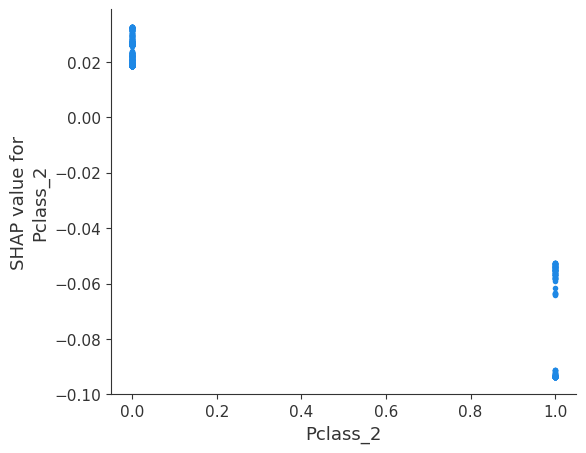

In [68]:
shap.dependence_plot(ind='Pclass_2', 
                     shap_values=rna_shap_values[0], 
                     features=x_train,
                     feature_names=feat_lst, 
                     interaction_index=None)

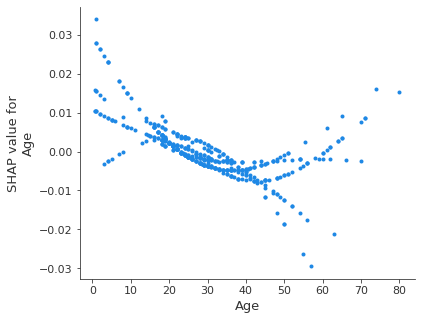

In [33]:
shap.dependence_plot(ind='Age', 
                     shap_values=rna_shap_values[0], 
                     features=x_train,
                     feature_names=feat_lst, 
                     interaction_index=None)

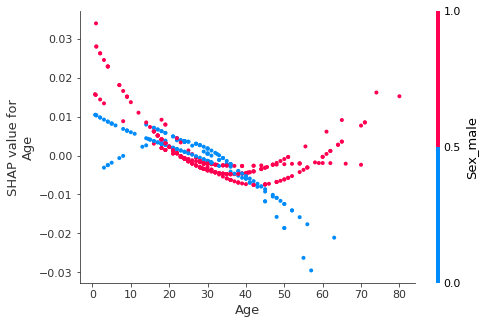

In [34]:
# Feature: Age e Sex_male
shap.dependence_plot(ind='Age', 
                     shap_values=rna_shap_values[0], 
                     features=x_train,
                     feature_names=feat_lst, 
                     interaction_index='Sex_male')

### Shapley Values

Utiliza uma abordagem de **Teoria dos Jogos** para explicar os efeitos das *features* na predição do *target*.

Duas características são muito interessantes deste método:
1. **Aditividade**: a soma dos efeitos é igual a diferença entre o **valor base** e a **saída do modelo**.
2. **Consistência**: a ordem das *features* **não altera a medição** dos efeitos.

In [39]:
x_train

array([[ 5. ,  1. ,  0. ,  0. ],
       [28.5,  0. ,  1. ,  1. ],
       [71. ,  0. ,  0. ,  1. ],
       ...,
       [45. ,  0. ,  1. ,  1. ],
       [ 8. ,  1. ,  0. ,  1. ],
       [20. ,  0. ,  1. ,  1. ]])

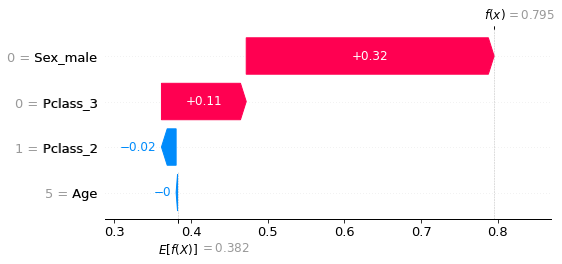

In [44]:
id_obs = 0

shap.plots._waterfall.waterfall_legacy(expected_value=rna_explainer.expected_value[0].numpy(),
                                       shap_values=rna_shap_values[0][id_obs],
                                       feature_names=feat_lst, 
                                       features=x_train[id_obs])

In [45]:
shap.initjs()

shap.force_plot(base_value=rna_explainer.expected_value[0].numpy(), 
                shap_values=rna_shap_values[0][id_obs],
                feature_names=feat_lst,
                features=x_train[id_obs])

## Modelo Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
# Define estrutura e configurações do modelo
modelo_rf = RandomForestClassifier(n_estimators=200,
                                   max_depth=3,
                                   min_samples_leaf=20,
                                   max_samples=0.7,
                                   random_state = 42)

# Ajusta o modelo
modelo_rf.fit(x_train, y_train)

# Métricas de Desempenho
preditiva.calcula_desempenho(modelo_rf,
                             x_train, y_train,
                             x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.807229,0.752336,-0.07
AUROC,0.879874,0.789558,-0.10
KS,0.633937,0.542587,-0.14
Precision,0.954545,0.897959,-0.06
Recall,0.535714,0.478261,-0.11
F1,0.686275,0.624113,-0.09


### Extração do Aprendizado da Random Forest

In [75]:
# Utilizar uma amostra de até 1.000 observações para extração do conhecimento
rf_explainer = shap.TreeExplainer(model=modelo_rf, 
                                  data=x_train)

rf_shap_values = rf_explainer.shap_values(X=x_train)

### Importância das Variáveis

In [78]:
rf_shap_values

[array([[-0.01323595,  0.01774233, -0.12475548, -0.29570647],
        [ 0.0043858 , -0.01669586,  0.13324279,  0.15755739],
        [ 0.03967705, -0.0335982 , -0.11890866,  0.18041795],
        ...,
        [ 0.02529617, -0.01680991,  0.14047816,  0.16313298],
        [-0.04552554,  0.06316304, -0.08137002,  0.19527313],
        [ 0.00263292, -0.01572194,  0.13129382,  0.15157199]]),
 array([[ 0.01323594, -0.01774233,  0.12475548,  0.29570647],
        [-0.0043858 ,  0.01669586, -0.13324279, -0.15755739],
        [-0.03967705,  0.0335982 ,  0.11890866, -0.18041795],
        ...,
        [-0.02529617,  0.01680991, -0.14047816, -0.16313298],
        [ 0.04552553, -0.06316304,  0.08137002, -0.19527313],
        [-0.00263292,  0.01572194, -0.13129382, -0.15157199]])]

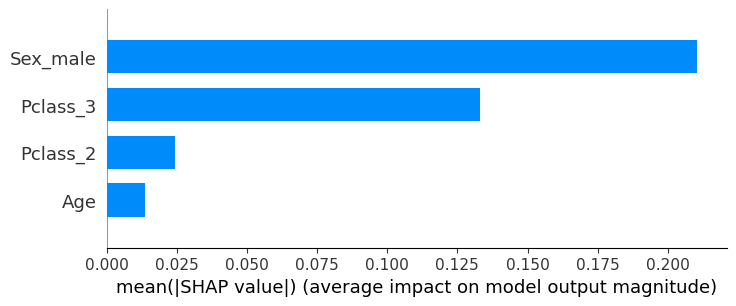

In [76]:
# ATENÇÃO: ajustar o shap_values de acordo com a saída do modelo
shap.summary_plot(shap_values=rf_shap_values[1],
                  plot_type='bar',
                  feature_names=feat_lst)

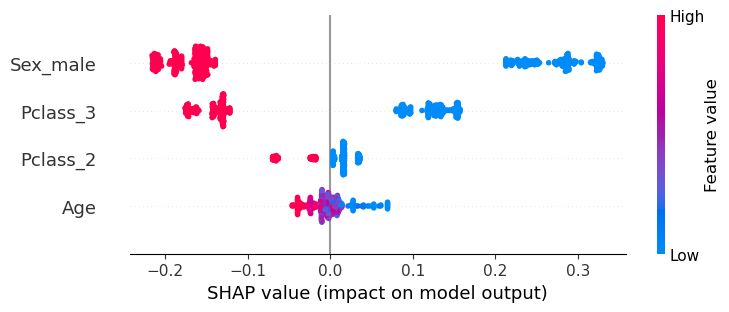

In [81]:
# ATENÇÃO: ajustar o shap_values de acordo com a saída do modelo
shap.summary_plot(shap_values=rf_shap_values[1], 
                  features=x_train,
                  feature_names=feat_lst,
                  plot_type='dot')

### Dependência Parcial

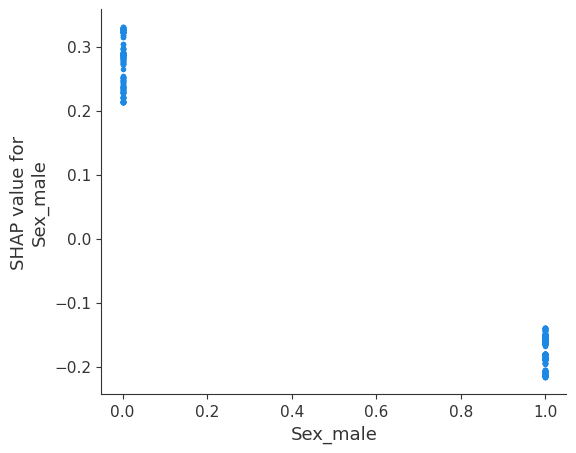

In [82]:
# Feature: Sex_male
shap.dependence_plot(ind='Sex_male', 
                     shap_values=rf_shap_values[1], 
                     features=x_train,
                     feature_names=feat_lst, 
                     interaction_index=None)

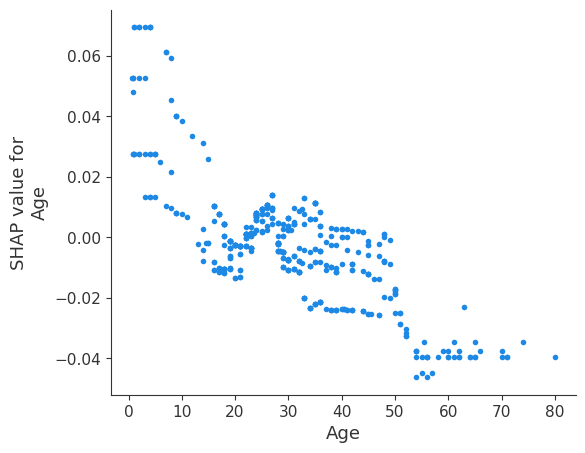

In [83]:
# Feature: Age
shap.dependence_plot(ind='Age', 
                     shap_values=rf_shap_values[1], 
                     features=x_train,
                     feature_names=feat_lst, 
                     interaction_index=None)

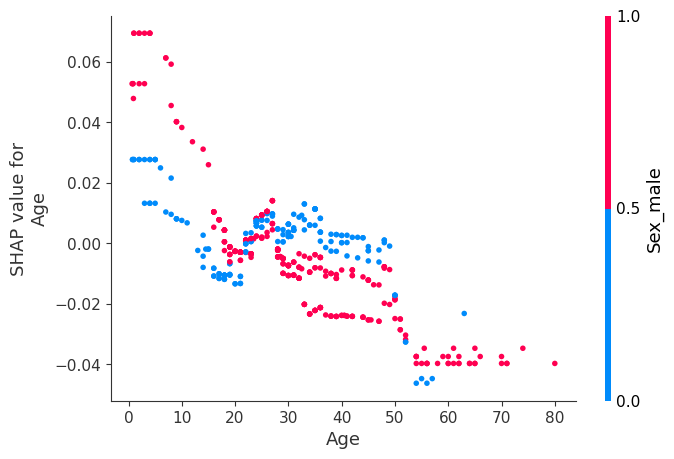

In [84]:
# Feature: Duracao_Emprestimo
shap.dependence_plot(ind='Age', 
                     shap_values=rf_shap_values[1], 
                     features=x_train,
                     feature_names=feat_lst, 
                     interaction_index='Sex_male')

### Shapley Values

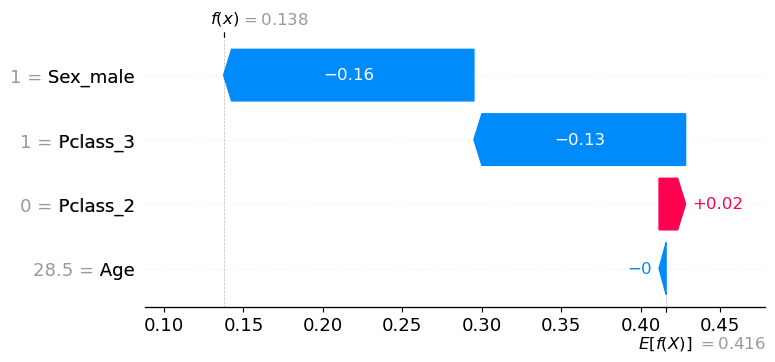

In [85]:
id_obs = 1

shap.plots._waterfall.waterfall_legacy(expected_value=rf_explainer.expected_value[1],
                                       shap_values=rf_shap_values[1][id_obs],
                                       feature_names=feat_lst, 
                                       features=x_train[id_obs])

In [86]:
shap.initjs()

shap.force_plot(base_value=rf_explainer.expected_value[1], 
                shap_values=rf_shap_values[1][id_obs],
                feature_names=feat_lst,
                features=x_test[id_obs])

## Modelo Gradient Boosting

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
# Define estrutura e configurações do modelo
modelo_gb = GradientBoostingClassifier(n_estimators=50,
                                       subsample=0.8,
                                       max_depth=2,
                                       min_samples_leaf=20,
                                       random_state = 42)

# Ajusta o modelo
modelo_gb.fit(x_train, y_train)

# Métricas de Desempenho
preditiva.calcula_desempenho(modelo_gb,
                             x_train, y_train,
                             x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.829317,0.785047,-0.05
AUROC,0.899049,0.811921,-0.10
KS,0.684687,0.594262,-0.13
Precision,0.937008,0.910714,-0.03
Recall,0.607143,0.554348,-0.09
F1,0.736842,0.689189,-0.06


### Extração do Aprendizado do Gradient Boosting

In [89]:
# Utilizar uma amostra de até 1.000 observações para extração do conhecimento
gb_explainer = shap.TreeExplainer(model=modelo_gb, 
                                  data=x_train)

gb_shap_values = gb_explainer.shap_values(X=x_train)

In [93]:
gb_shap_values

array([[ 1.17146669, -0.45778012,  1.03949497,  1.55545291],
       [-0.07340938,  0.23747477, -0.97572503, -0.85733772],
       [-0.81454957,  0.3181449 ,  0.86104935, -1.10376798],
       ...,
       [-0.34644415,  0.23747477, -1.04847793, -0.83393319],
       [ 0.55242324, -0.74157332,  0.79418535, -1.0396049 ],
       [-0.19756288,  0.23747477, -0.98126416, -0.85733772]])

In [90]:
len(gb_shap_values)

498

In [92]:
len(rf_shap_values[1])

498

### Importância das Variáveis

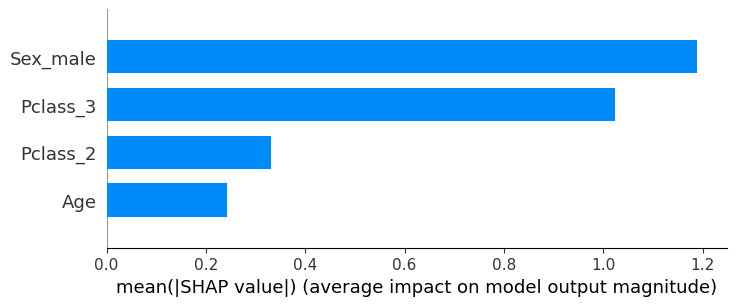

In [94]:
# ATENÇÃO: ajustar o shap_values de acordo com a saída do modelo
shap.summary_plot(shap_values=gb_shap_values,
                  plot_type='bar',
                  feature_names=feat_lst)

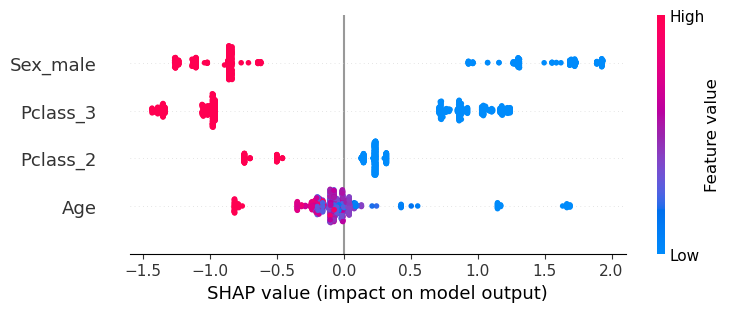

In [95]:
# ATENÇÃO: ajustar o shap_values de acordo com a saída do modelo
shap.summary_plot(shap_values=gb_shap_values, 
                  features=x_train,
                  feature_names=feat_lst,
                  plot_type='dot')

### Dependência Parcial

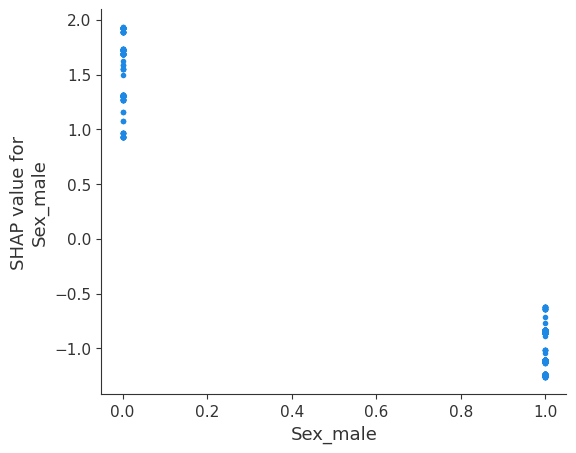

In [96]:
# Feature: Sex_male
shap.dependence_plot(ind='Sex_male', 
                     shap_values=gb_shap_values, 
                     features=x_train,
                     feature_names=feat_lst, 
                     interaction_index=None)

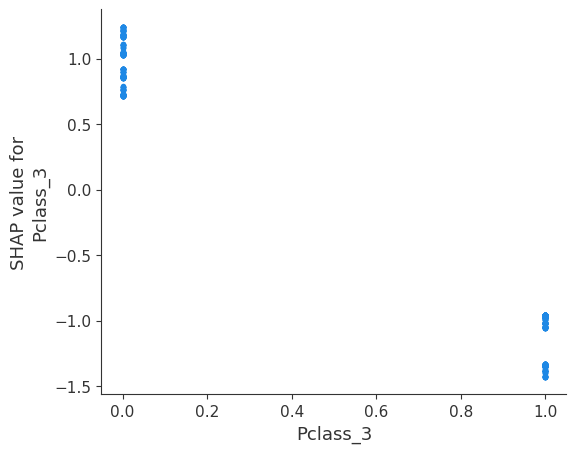

In [97]:
# Feature: Pclass_3
shap.dependence_plot(ind='Pclass_3', 
                     shap_values=gb_shap_values, 
                     features=x_train,
                     feature_names=feat_lst, 
                     interaction_index=None)

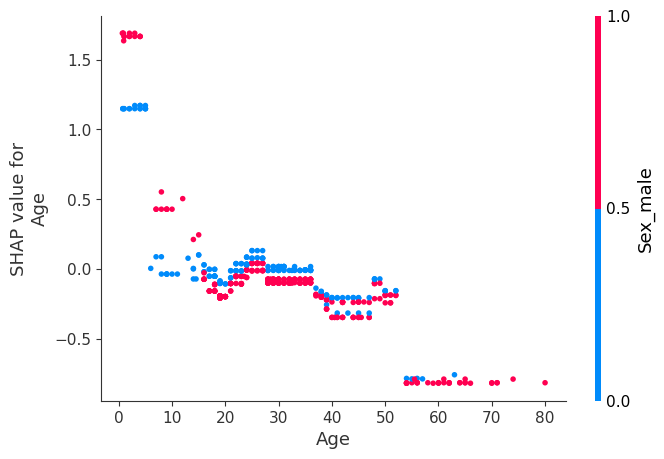

In [98]:
# Feature: Age vs Sex_male
shap.dependence_plot(ind='Age', 
                     shap_values=gb_shap_values, 
                     features=x_train,
                     feature_names=feat_lst, 
                     interaction_index='Sex_male')

### Shapley Values

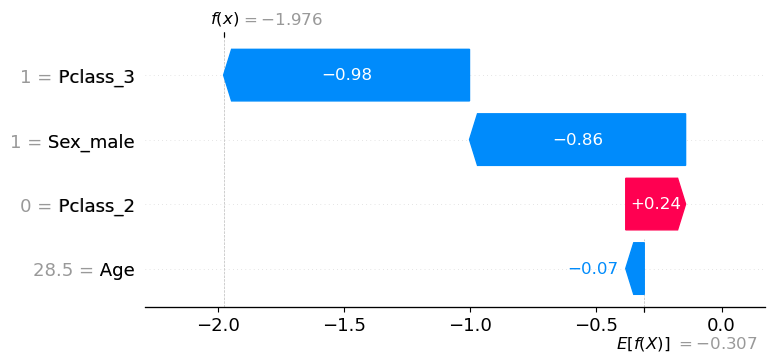

In [99]:
id_obs = 1

shap.plots._waterfall.waterfall_legacy(expected_value=gb_explainer.expected_value,
                                       shap_values=gb_shap_values[id_obs],
                                       feature_names=feat_lst, 
                                       features=x_train[id_obs])

In [100]:
shap.initjs()

shap.force_plot(base_value=gb_explainer.expected_value, 
                shap_values=gb_shap_values[id_obs],
                feature_names=feat_lst,
                features=x_train[id_obs], link='logit')